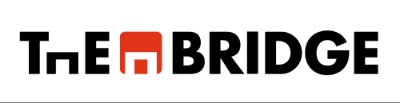

**GRÁFICOS PARA PRESENTACIÓN DATASET TITANIC**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
from bootcampviztools import *


Limpiamos el dataset

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.drop(columns=["survived", "deck", "pclass","embarked"], inplace=True)

In [4]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

In [5]:
df_titanic.drop(columns= ["parch", "sibsp"],inplace = True)

In [6]:
df_titanic["age"].fillna(df_titanic["age"].mean(), inplace = True)

In [7]:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

Comenzamos a crear los gráficos

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

1-El titanic fue un accidente con una tasa de mortalidad alta. 

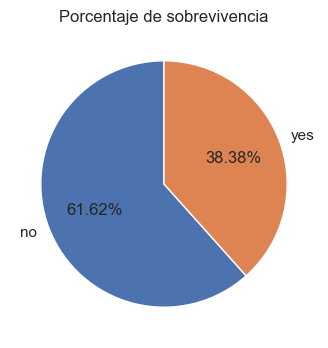

In [8]:
data = df_titanic["alive"].value_counts()
fig,ax = plt.subplots(1,1,figsize = (4,4))
ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90)
ax.set_title("Porcentaje de sobrevivencia");

2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...

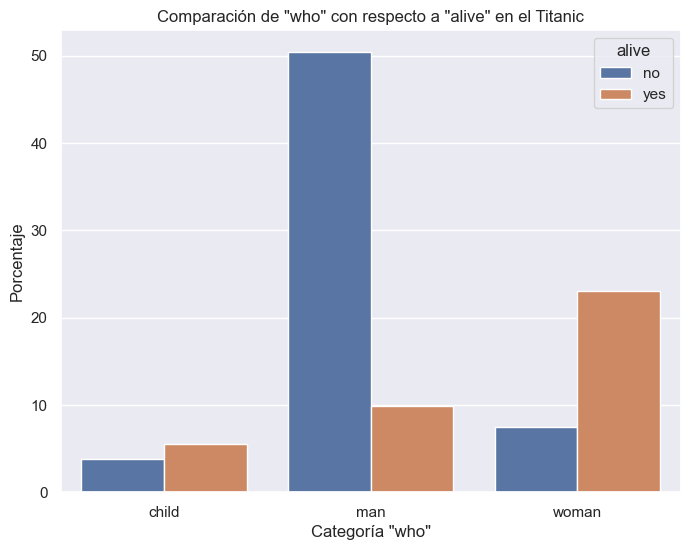

In [18]:
valores_relativos = df_titanic.groupby(['who', 'alive']).size() / len(df_titanic) * 100
valores_relativos = valores_relativos.reset_index(name='percentage')
plt.figure(figsize=(8, 6))
sns.barplot(x='who', y='percentage', hue='alive', data=valores_relativos)
plt.title('Comparación de "who" con respecto a "alive" en el Titanic')
plt.xlabel('Categoría "who"')
plt.ylabel('Porcentaje')
plt.legend(title='alive')
plt.show()

que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    

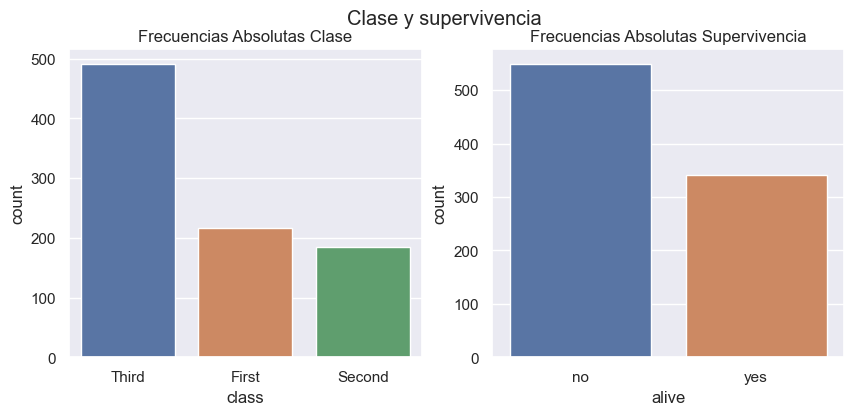

In [ ]:

fig2,ax2 = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig2.suptitle("Clase y supervivencia")
sns.countplot(x = "class", data = df_titanic, ax = ax2[0], hue = "class", legend = False)
ax2[0].set_title("Frecuencias Absolutas Clase")
sns.countplot(x = "alive", data = df_titanic, ax = ax2[1], hue = "alive", legend = False)
ax2[1].set_title("Frecuencias Absolutas Supervivencia");


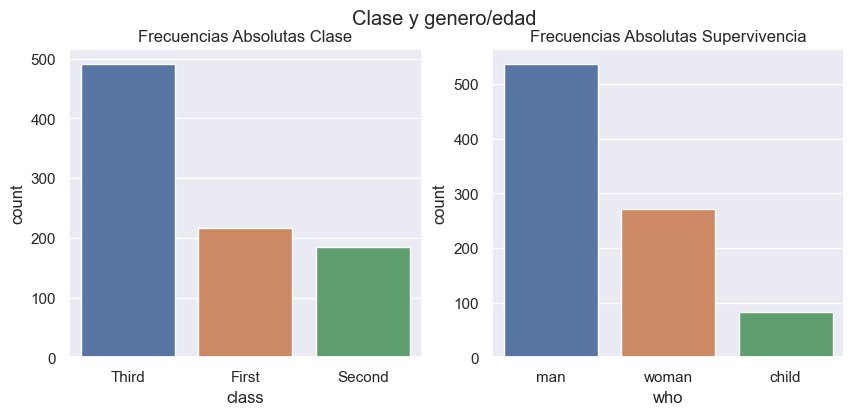

In [22]:
fig2,ax2 = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig2.suptitle("Clase y genero/edad")
sns.countplot(x = "class", data = df_titanic, ax = ax2[0], hue = "class", legend = False)
ax2[0].set_title("Frecuencias Absolutas Clase")
sns.countplot(x = "who", data = df_titanic, ax = ax2[1], hue = "who", legend = False)
ax2[1].set_title("Frecuencias Absolutas Supervivencia");

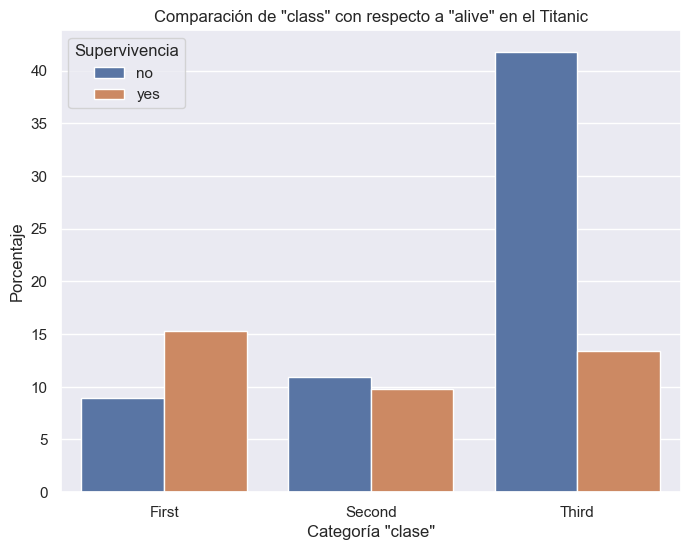

In [19]:
valores_relativos = df_titanic.groupby(['class', 'alive']).size() / len(df_titanic) * 100
valores_relativos = valores_relativos.reset_index(name='percentage')
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='percentage', hue='alive', data=valores_relativos)
plt.title('Comparación de "class" con respecto a "alive" en el Titanic')
plt.xlabel('Categoría "clase"')
plt.ylabel('Porcentaje')
plt.legend(title='Supervivencia')
plt.show()

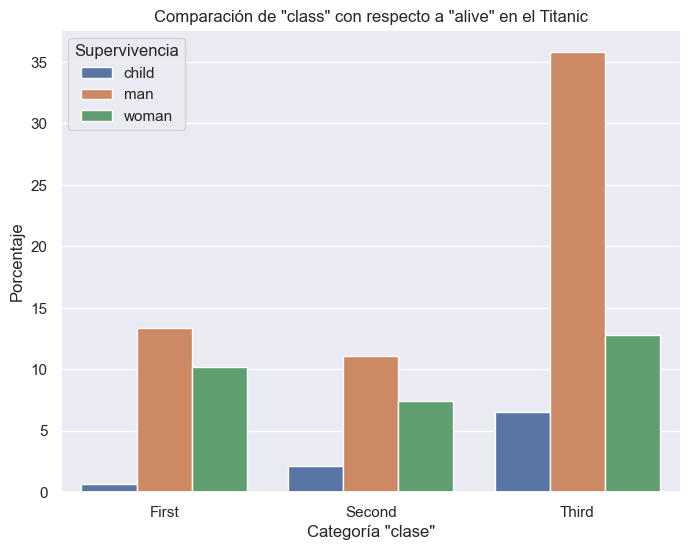

In [23]:
valores_relativos = df_titanic.groupby(['class', 'who']).size() / len(df_titanic) * 100
valores_relativos = valores_relativos.reset_index(name='percentage')
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='percentage', hue='who', data=valores_relativos)
plt.title('Comparación de "class" con respecto a "alive" en el Titanic')
plt.xlabel('Categoría "clase"')
plt.ylabel('Porcentaje')
plt.legend(title='Supervivencia')
plt.show()

In [20]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


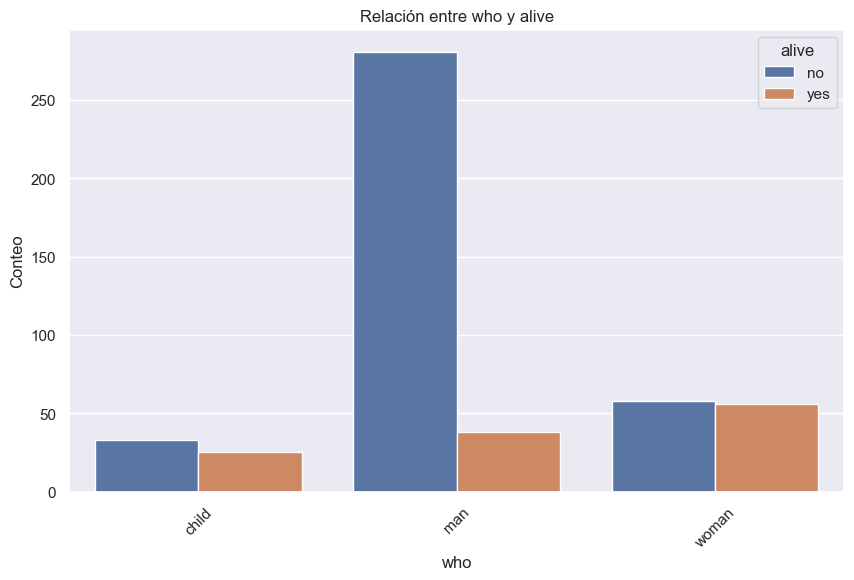

Respuesta First:


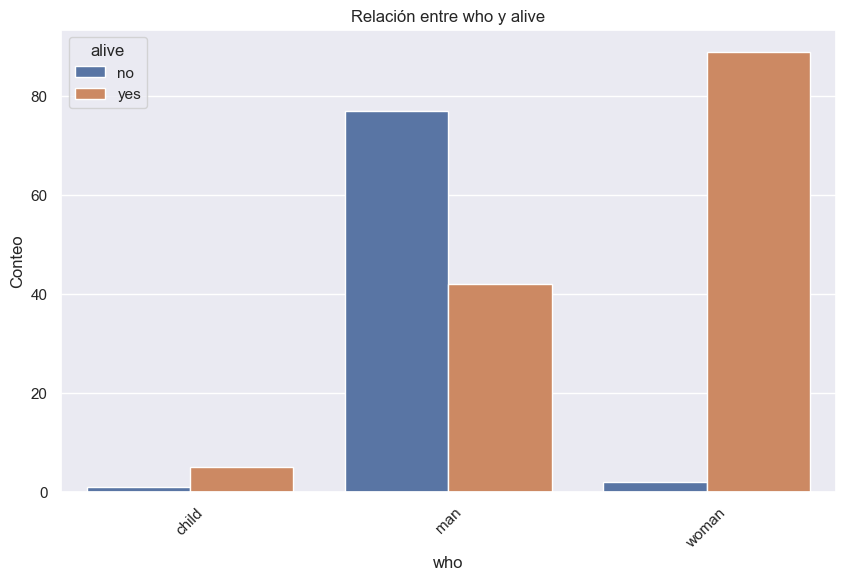

Respuesta Second:


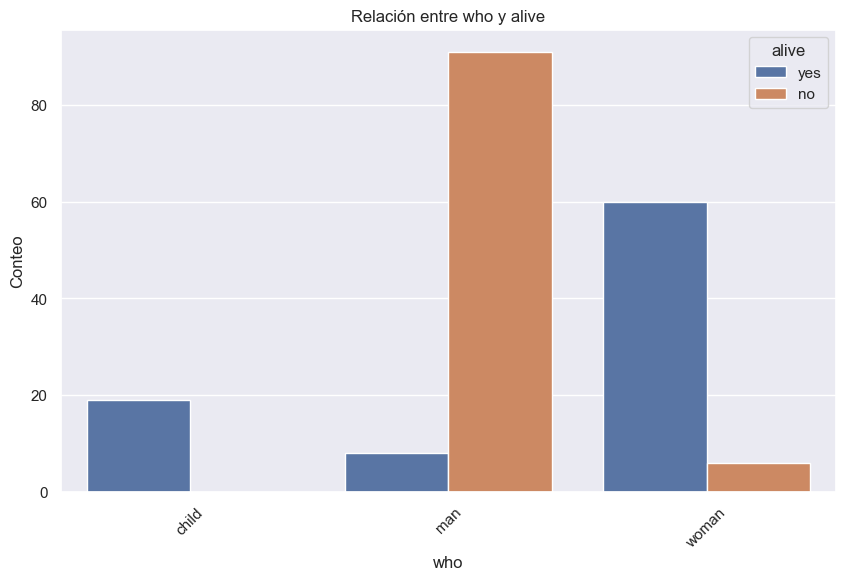

In [21]:
tricategorical_analysis(df_titanic, "class", ["alive","who"])

5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

no puede terminar :(